In [1]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from pathlib import Path
import IPython.display as ipd

import utils

In [2]:
AUDIO_DIR = str(os.environ.get('AUDIO_DIR'))
METADATA_DIR = str(os.environ.get('METADATA_DIR'))
metadata_dir = Path(METADATA_DIR)

In [121]:
filename_amp = utils.get_audio_path(AUDIO_DIR, 2)
x_amp, sr_amp = librosa.load(filename_amp, sr=None, mono=True)
ipd.Audio(x_amp, rate=sr_amp)

# Waveform

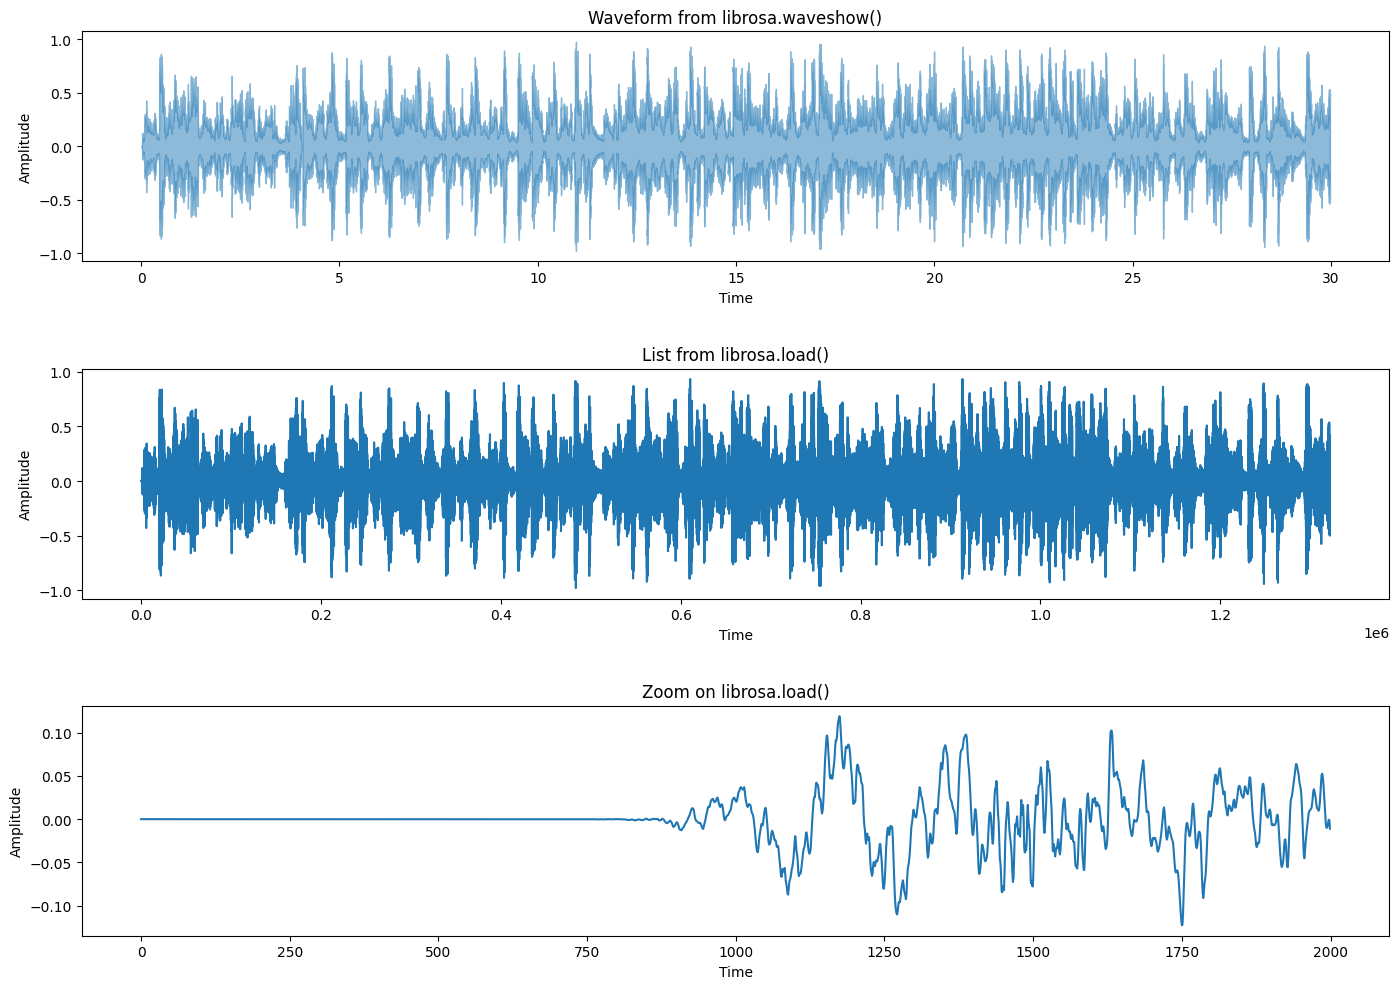

In [122]:
fig_waveform, axes_waveform = plt.subplots(nrows=3, ncols=1)

axes_waveform[0].set_xlabel('Time')
axes_waveform[0].set_ylabel('Amplitude')
axes_waveform[0].set_title('Waveform from librosa.waveshow()')

axes_waveform[1].set_xlabel('Time')
axes_waveform[1].set_ylabel('Amplitude')
axes_waveform[1].set_title('List from librosa.load()')

axes_waveform[2].set_xlabel('Time')
axes_waveform[2].set_ylabel('Amplitude')
axes_waveform[2].set_title('Zoom on librosa.load()')

fig_waveform.set_size_inches(14, 10)
fig_waveform.tight_layout(h_pad=3.0)

librosa.display.waveshow(x_amp, sr=sr_amp, alpha=0.5, ax=axes_waveform[0])
axes_waveform[1].plot(x_amp)
axes_waveform[2].plot(x_amp[:2000])

In [123]:
estimated_time_to_start = 1/sr_amp * 875
print(f'{estimated_time_to_start:0.4f}s ({estimated_time_to_start*1000:0.1f}ms)')

0.0198s (19.8ms)


In [124]:
librosa.get_duration(y=x_amp[:875], sr=sr_amp)

0.01984126984126984

# Spectrogram

STFT -> abs -> to dB

Amplitude/magnitude spectrogram

Power spectrogram

MEL spectrogram

In [125]:
FRAME_SIZE = 2048
HOP_SIZE = 512

[ref=np.max wasn't used before]

[ref = np.max results in the purple colors]

[ref is calculated on amplitude_to_db()]

spectrogram.shape[0] = frame_size / 2 + 1

spectrogram.shape[1] = frame amount

In [126]:
spectrogram_amp = librosa.amplitude_to_db(np.abs(librosa.stft(x_amp, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)))
spectrogram_amp.shape # (freq_bins, frames)

(1025, 2582)

In [127]:
spectrogram_pow = librosa.power_to_db(np.abs(librosa.stft(x_amp, n_fft=FRAME_SIZE, hop_length=HOP_SIZE))**2)
spectrogram_pow.shape # (freq_bins, frames)

(1025, 2582)

In [128]:
spectrogram_mel = librosa.feature.melspectrogram(y=x_amp, sr=sr_amp, n_fft=FRAME_SIZE, hop_length=HOP_SIZE, n_mels=10)
spectrogram_mel.shape # (n_mels, frames)

(10, 2582)

In [129]:
spectrogram_mel_log = librosa.power_to_db(spectrogram_mel)
spectrogram_mel_log.shape # (n_mels, frames)

(10, 2582)

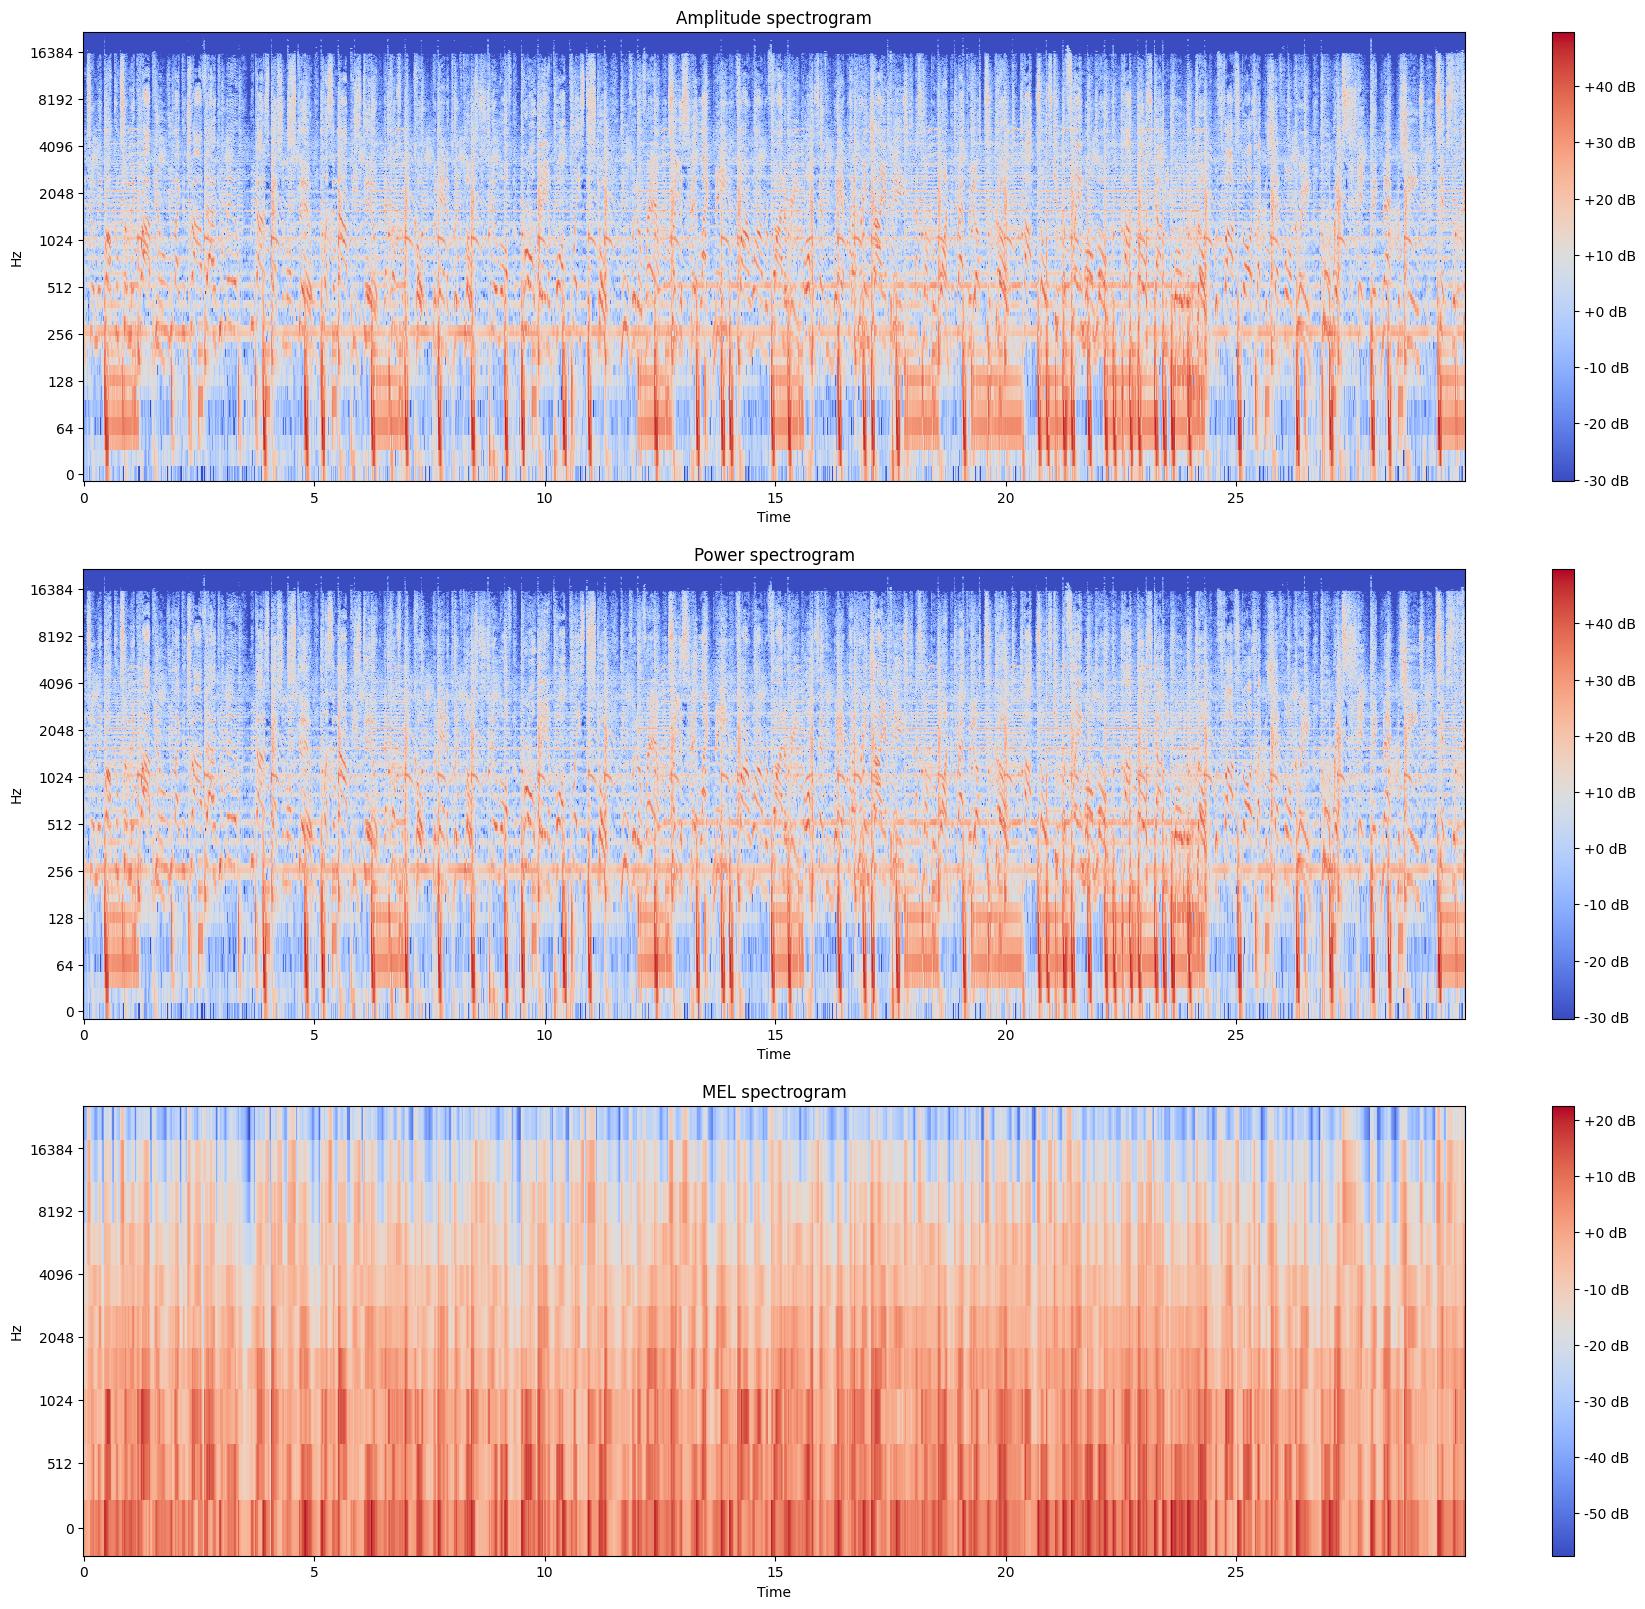

In [130]:
fig_spectrogram, axes_spectrogram = plt.subplots(nrows=3, ncols=1)

axes_spectrogram[0].set_title('Amplitude spectrogram')
axes_spectrogram[1].set_title('Power spectrogram')
axes_spectrogram[2].set_title('MEL spectrogram')

fig_spectrogram.set_size_inches(18, 16)
fig_spectrogram.tight_layout(h_pad=3.0)

spec_amp_img = librosa.display.specshow(spectrogram_amp, sr=sr_amp, x_axis='time', y_axis='log', ax=axes_spectrogram[0])
spec_pow_img = librosa.display.specshow(spectrogram_pow, sr=sr_amp, x_axis='time', y_axis='log', ax=axes_spectrogram[1])
spec_mel_img = librosa.display.specshow(spectrogram_mel_log, sr=sr_amp, x_axis='time', y_axis='mel', ax=axes_spectrogram[2])

fig_spectrogram.colorbar(spec_amp_img, ax=axes_spectrogram[0], format='%+2.0f dB')
fig_spectrogram.colorbar(spec_pow_img, ax=axes_spectrogram[1], format='%+2.0f dB')
fig_spectrogram.colorbar(spec_mel_img, ax=axes_spectrogram[2], format='%+2.0f dB')

Conclusion: amplitude/magnitude and power result in the same plot.

# MFCC

In [131]:
N_MFCC = 13

In [132]:
mfccs = librosa.feature.mfcc(y=x_amp, n_mfcc=N_MFCC, sr=sr_amp)
mfccs.shape # (n_mfcc, frames)

(13, 2582)

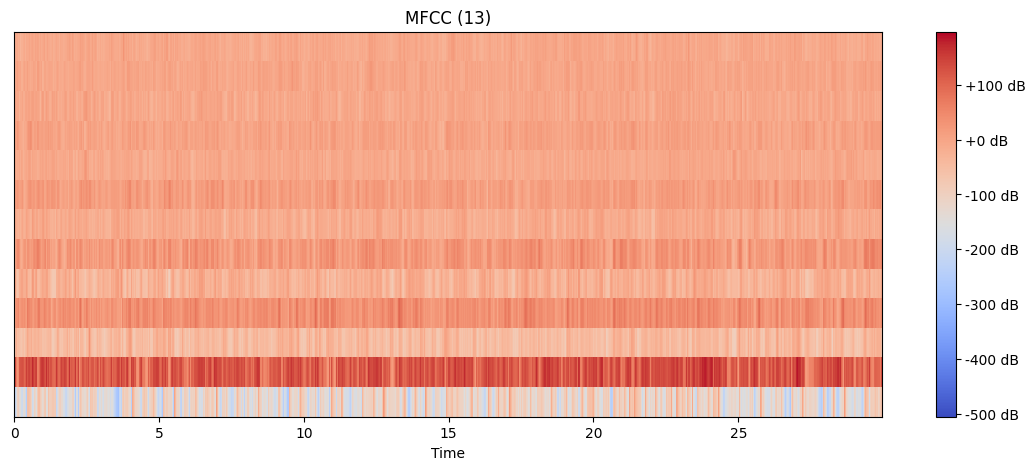

In [133]:
fig_mfcc, ax_mfcc = plt.subplots()

ax_mfcc.set_title(f'MFCC ({N_MFCC})')
ax_mfcc.set_xlabel('Time')
ax_mfcc.set_ylabel('MFCC Coefficients')

fig_mfcc.set_size_inches(14, 5)

spec_mfcc = librosa.display.specshow(mfccs, x_axis="time", sr=sr_amp, ax=ax_mfcc)
fig_mfcc.colorbar(spec_mfcc, ax=ax_mfcc, format='%+2.0f dB')
